<p style="text-align:center;">
<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/World_Health_Organization_Logo.svg"
     alt="WHOLogo"
     style="float: center; margin-right: 10px;"
     width=1000 />
</p>

# **WHO Life Expectancy Linear Regression Analysis**

In this project, we will be taking a look at data provided by the World Health Organisation, and using it to create a model that can accurately predict life expectancy.

We will be performing Exploratory Data Analysis to look at what insights the data can draw, considering ethical limitations to how we can use our data, performing feature engineering to allow us to build and evaluate an optimised model, and finally report our findings and decide what conclusions we can draw regarding our model. 

#### **Objectives**:
* Explore the dataset and identify corrolated features.
* Engineer features to create an effective model.
* Evaluate the model against the test & train data.

#### To begin, we first need to import our libraries 

In [2]:
# Imports
# To perform mathematical operations 
import numpy as np  

# To handle data
import pandas as pd

# To create our data visualisations
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model Evalutation
import statsmodels.api as sm
import statsmodels.tools

# **Exploratory Data Analysis**
### **Data Quality Check**

To start, we will first load our data set, and take a look at the contents to determine whether or not it will require any cleaning

```python
df.info()       # Confirming suitability for modelling

df.describe()   # basic overview to identify potential compounding factors
```

In [8]:
url = "https://docs.google.com/spreadsheets/d/1x3in91KWLNF_111tOyRg2w1h60ni1am3HqixwabLG5Y/export?format=csv"
df = pd.read_csv(url) #This line reads the csv from a public browser

In [9]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [ ]:
df.info()   # shows counts and datatypes

In [ ]:
df.describe()

From this initial look at information on our columns, we can see that there are no null values in our data. We can also conclude that all of the columns are of reasonable data types. 

Let's now take a look at any columns that contain 0 values:

In [4]:
# Count zeros per column 
print((df == 0).sum())


Country                           0
Region                            0
Year                              0
Infant_deaths                     0
Under_five_deaths                 0
Adult_mortality                   0
Alcohol_consumption              38
Hepatitis_B                       0
Measles                           0
BMI                               0
Polio                             0
Diphtheria                        0
Incidents_HIV                     0
GDP_per_capita                    0
Population_mln                    0
Thinness_ten_nineteen_years       0
Thinness_five_nine_years          0
Schooling                         0
Economy_status_Developed       2272
Economy_status_Developing       592
Life_expectancy                   0
dtype: int64


Two of our columns are binary values, the columns being `Economy_status_Developed` and `Economy_status_Developing`. For that reason, we can only focus on the `Alcohol_consumption` column containing 0 values. 

Our `Alcohol_consumption` column contains 38 zero values. To investigate this further, let's take a look at what countries actually produced these zero values.

In [5]:
zero_countries = df[df['Alcohol_consumption'] == 0]['Country'].unique()

# Format nicely
formatted_countries = ", ".join(zero_countries)
print(f"The countries that list alcohol consumption as 0 are: {formatted_countries}.")

The countries that list alcohol consumption as 0 are: Saudi Arabia, Kuwait, Somalia, Bangladesh, Mauritania, Afghanistan, Libya.


### **Social Analysis:**  
The zero alcohol consumption in these countries is likey due to religious and cultural reasons. These nations are predominantly Muslim and the production, sale, and consumption of alcohol. As a result, official per capita alcohol consumption is recorded as zero, even though some unrecorded or illicit consumption may exist.  

### **Important Note:**  
This is an example of cultural or religious bias in data. When analyzing global alcohol consumption, it’s important to recognize that zeros in this column may not reflect individual behavior fully but rather legal and societal restrictions. Accounting for such context helps avoid misleading conclusions when comparing countries.

#### **Defining Features and Target**

In [11]:
# Seperating features and target
X = df.drop(columns='Life_expectancy')
y = df['Life_expectancy']

### **Initial Model**
Once we had confirmed that our data was in a good place fed the dataframe through an uncritical quick and dirty model to set a baseline from which we could build:

> **R<sup>2</sup> :**     0.979  
> **Condition No. :** 1.8 e18  
> **RMSE:**          1.15  

Obviously these results are extremely unstable, but using these indications we could now move into more detail explorations while looking out for key indicators that could impact stability.


### **Correlation Heatmap**


In [19]:
sns.set_style("whitegrid", {
    "grid.color": "lightgray",      # grid line color
    "grid.linestyle": "--",    # solid (‘-’), dashed (‘--’), dotted (‘:’) etc.
    "grid.linewidth": 0.1,     # thickness
    "axes.facecolor": "white", # background color
})

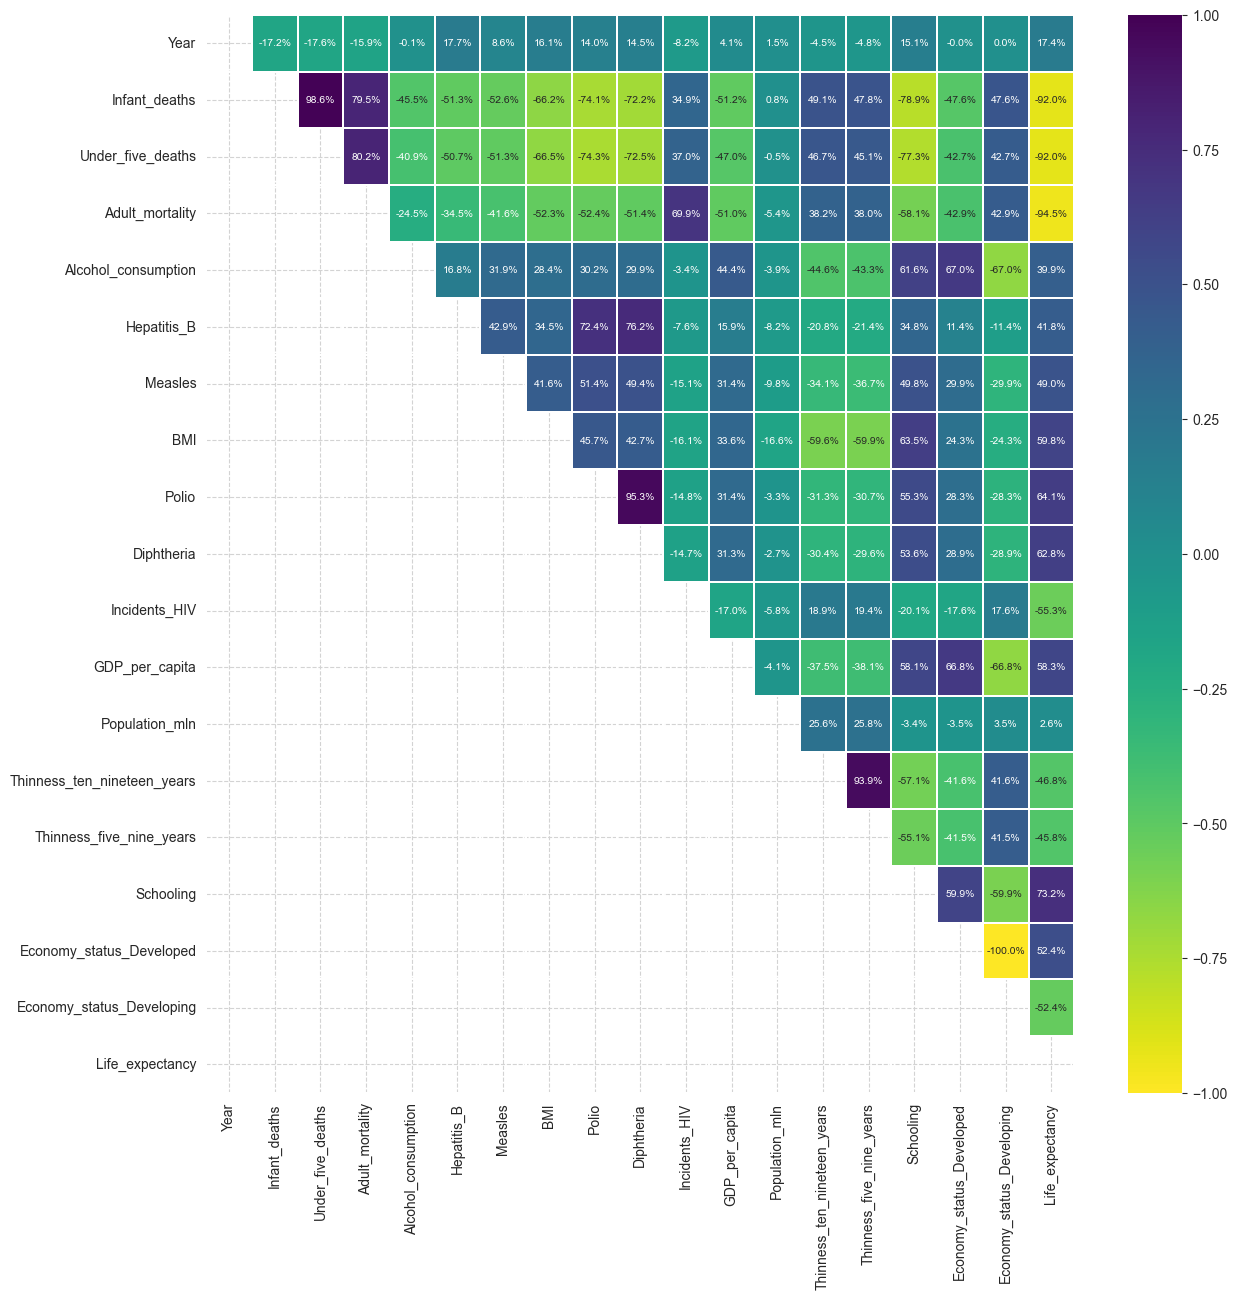

In [ ]:
plt.figure(figsize = (14, 14))                                                   # Setting plot size

sns.heatmap(df.select_dtypes(include=np.number).corr(),
            annot = True,                                                        # adding labels
            annot_kws={"fontsize":7.5},                                          # adjusting font size
            fmt = '.1%',                                                         # rounding
            vmin = -1, vmax = +1,                                                # setting scale
            cmap = 'viridis_r',                                                  # colour mapping
            linewidths=0.1,                                                      # adding whitespace for readability
            mask = np.tril(df.select_dtypes(include=np.number).corr()))          # removing redundant maps

plt.show()


As we can see, there are a number of notable metrics that could inform a model. However, there are also a number of evident correlations between relational categories:

* Infant/Under 5 deaths
* Overall mortality (Child/Adult)
* Thinness
* Disease/Vaccine data
* GDP/Economic status

Using our preliminary model, we were able to identify columns with high p-values that could be removed to reduce volatility and multicollinearity in the final model, and coupled with the data above, we moved into investigating those related metrics.



### **Multicollinearity**

Our first two relationships are outlined below:


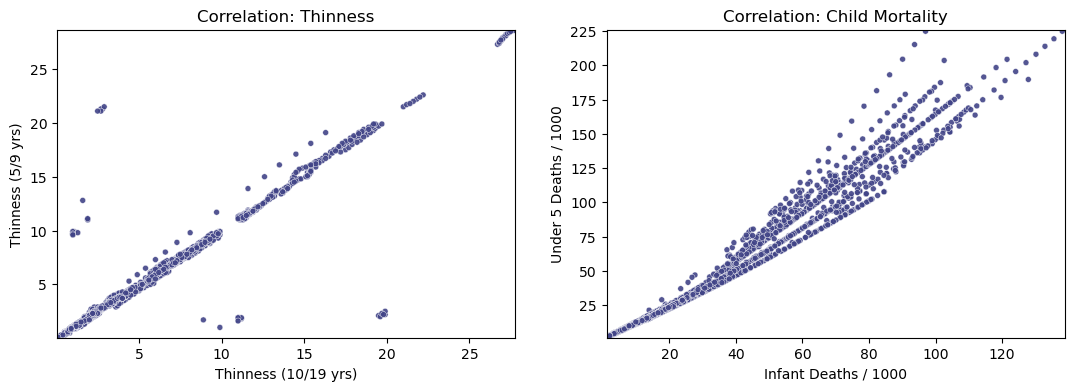

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(13,4))                   # displaying related graphs on one plane and defining plot size

sns.scatterplot(x='Thinness_ten_nineteen_years',
                y = 'Thinness_five_nine_years',
                color = cm.viridis(0.2),                         # defining colour, mapped from 'viridis' hue
                size = 0.3,                                      # point size
                alpha = 0.9,                                     # point transparency
                marker = "o",                                    # point marker shape
                ax=axes[0],                                      # definition for titles/labels
                data = df)

axes[0].set_title('Correlation: Thinness')
axes[0].set_xlabel('Thinness (10/19 yrs)')
axes[0].set_ylabel('Thinness (5/9 yrs)')
axes[0].legend().remove()
axes[0].margins(0.002)

sns.scatterplot(x='Infant_deaths',
                y = 'Under_five_deaths',
                color = cm.viridis(0.2),
                size = 0.3,
                alpha = 0.9,
                marker = "o",
                ax=axes[1],
                data = df)

axes[1].set_title('Correlation: Child Mortality')
axes[1].set_xlabel('Infant Deaths / 1000')
axes[1].set_ylabel('Under 5 Deaths / 1000')
axes[1].legend().remove()
axes[1].margins(0.005)

plt.show()


As we can see, these variables are highly correlated, and as such we can likely seek to combine or refine these in our final column set. However, when we look at death/mortality metrics as a whole we can see more of a spread.

This indicates a possibility of both columns being independently relevant to any modelling, and given the high correlation to our target, we will explore this further during feature engineering:


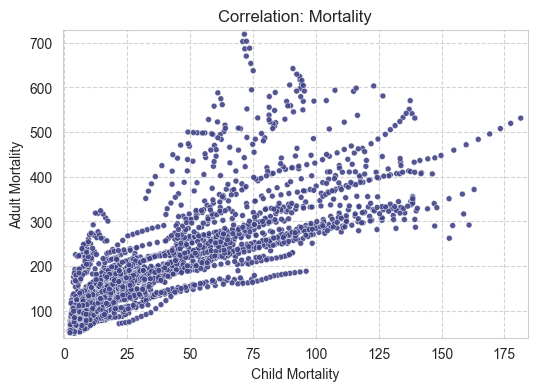

In [25]:
df['Child_deaths'] = df[['Infant_deaths', 'Under_five_deaths']].mean(axis=1)     # combining above columns into mean

plt.figure(figsize=(6,4))

sns.scatterplot(x='Child_deaths',
                y = 'Adult_mortality',
                color = cm.viridis(0.2),
                size = 0.3,
                alpha = 0.9,
                marker = "o",
                data = df)

plt.title('Correlation: Mortality')
plt.xlabel('Child Mortality')
plt.ylabel('Adult Mortality')
plt.legend().remove()
plt.margins(0.015)
plt.grid(True)
plt.show()


### **Duplicates**
We checked if any country was entered twice for each year by mistake to make sure there were no conflicting entries.



In [13]:
df_dupes = df[['Country','Year']] 
df_dupes.duplicated().value_counts() # should expect all 2864 to be False for no duplicates

False    2864
Name: count, dtype: int64

### **Outliers**
As noted above, we created new tables excluding the outliers in some of the categories where the outliers stood out on the box plots (namely for thinness, alcohol consumption and BMI) to see if removing those outliers would make our model more accurate. However, this **did not end up having a significant effect on the RMSE**, and even increased it in some cases, so we chose to keep the outliers in the final model.

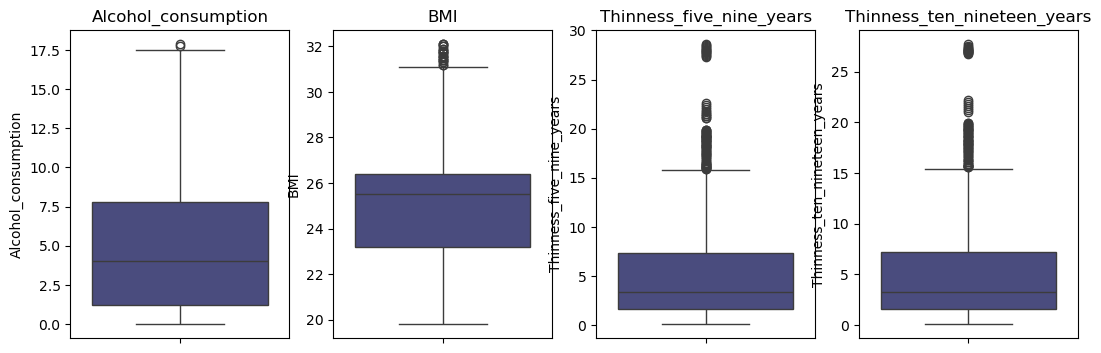

In [14]:
# Displaying box plots to find categories where outliers stood out
fig, axes = plt.subplots(1, 4, figsize=(13,4))

box_cols = [
     'Alcohol_consumption'
    , 'BMI'
    , 'Thinness_five_nine_years'
    , 'Thinness_ten_nineteen_years'
    ]

for ax, col in zip(axes,box_cols):
    sns.boxplot(y=df[col],ax=ax,color = cm.viridis(0.2))
    ax.set_title(col)

plt.show()


# **Ethics**

We felt it was important to give the user the choice to exclude sensitive information from the model. This sensitive information can be divided into 3 categories:

* Medical data
    * BMI
    * Thinness
    * Incidents_HIV
    * Measles
    * Vaccine_Index

* Vaccination data
    * Vaccine_Index

* Data relating to minors
    * Child_mortality
    * Thinness
    * Vaccine_Index
    * Incidents_HIV

NOTE: There is some overlap between categories (e.g., vaccination data is the immunisation coverage among 1-year-olds (%)).

In [15]:
def consent():
    # Asking for user inputs
    while True:
        medical = input('Do you consent to using medical population data, which may include protected information, for better accuracy? (Y/N): ').strip().upper()
        if medical in ('Y','N'):
            break
        else:
            print('Invalid input. Please enter either (Y/N)')

    while True:
        vaccine = input('Do you consent to using vaccination data, for better accuracy? (Y/N): ').strip().upper()
        if vaccine in ('Y','N'):
            break
        else:
            print('Invalid input. Please enter either (Y/N)')

    while True:
        child = input('Do you consent to using minor population data, for better accuracy? (Y/N): ').strip().upper()
        if child in ('Y','N'):
            break
        else:
            print('Invalid input. Please enter either (Y/N)')

    # Applying column filters
    exclude_col = []

    medical_col = ['BMI', 'Thinness', 'Incidents_HIV', 'Measles', 'Vaccine_Index']
    vaccine_col = ['Vaccine_Index']
    child_col = ['Child_mortality','Thinness', 'Vaccine_Index','Incidents_HIV']

    if vaccine == 'N':
        exclude_col += vaccine_col
    if child == 'N':
        exclude_col += child_col
    if medical == 'N':
        exclude_col += medical_col

    #Remove any duplicate columns (code taken from https://www.w3schools.com/python/python_howto_remove_duplicates.asp)
    exclude_col = list(dict.fromkeys(exclude_col))
    print(exclude_col)

    # Returns: list of columns to exclude
    return exclude_col

In [16]:
exculde_col = consent()

Do you consent to using medical population data, which may include protected information, for better accuracy? (Y/N):  y
Do you consent to using vaccination data, for better accuracy? (Y/N):  y
Do you consent to using minor population data, for better accuracy? (Y/N):  y


[]


# **Feature engineering**

Using what we have learned from the EDA, we can engineer the dataset to produce an effective model.
* We start by combining some features where there is higher collinearity. 

* Non-numeric data was corrected by dropping the country and one-hot encoding the region.
    * NOTE: OHE the regions was not relevant to the final model

* ``StandardScaler()`` is used over other scalers to account for how much the scale of each category differs (e.g. year compared to BMI).

* Logarithmic scaling is used to fit the GDP and Population trends to a linear model.

In [17]:
def feature_eng(df):
    df = df.copy()
    # Drop non-numerical data
    df.drop(columns='Country',inplace=True)

    # OHE Region
    df = pd.get_dummies(df, columns = ['Region'], drop_first = True, prefix = 'Region', dtype=int)

    # Log transform skewed variables
    df['GDP_log'] = np.log(df['GDP_per_capita'] + 1)
    df['Pop_log'] = np.log(df['Population_mln'] + 1)

    # Combine correlated features
    df['Child_mortality'] = df[['Infant_deaths','Under_five_deaths']].mean(axis=1)
    df['Thinness'] = df[['Thinness_ten_nineteen_years','Thinness_five_nine_years']].mean(axis=1)
    df["Vaccine_Index"] = df[['Polio', 'Diphtheria','Hepatitis_B']].mean(axis=1)
    
    # Scaling Numerical Data
    numeric_cols = df.select_dtypes(['int64','Float64']).columns
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # Adding a constant column
    df = sm.add_constant(df) 

    return df

# **Build and evaluate model**

#### **Test/Train Split**

In [18]:
# Test/Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### **OLS Regression Results**

To finalise our model, we utilized a blend of data collected from the intial model and individual column testing with reference to p-values to define our final feature set. We then used an 80/20 split to define our train and test data and applied our feature engineering. In evaluating model performance are looking at specifically at the following attributes:

* R<sup>2</sup> indicating what proportion of the data is explained by our model, and checking to ensure our data is not overfitting
* F-statistic alongside probability indicating the statisitc significance of the model
* Condition Number indicating potential volatility in the model caused by factors such as multicollinearity

In [19]:
# Building model using train data and selected features
feature_cols = [
    'const'
    , 'Year' 
    , 'Child_mortality' 
    , 'Adult_mortality'
    , 'Alcohol_consumption'
    , 'BMI'
    , 'Incidents_HIV'
    , 'Thinness'
    , 'GDP_log'
    , 'Economy_status_Developed'
    , 'Schooling'
    , 'Pop_log'
]

feature_cols = [col for col in feature_cols if col not in exculde_col]

X_train_fe = feature_eng(X_train)
lin_reg = sm.OLS(y_train, X_train_fe[feature_cols])
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.045e+04
Date:                Mon, 27 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:02:54   Log-Likelihood:                -3888.4
No. Observations:                2291   AIC:                             7801.
Df Residuals:                    2279   BIC:                             7870.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       68.7972      0.028   2486.389      0.000      68.743      68.851
Year                         0.1025      0.029      3.579      0.000       0.046       0.159
Child_mortality             -3.5692      0.069    -52.016      0.000      -3.704      -3.435
Adult_mortality             -5.4468      0.080    -68.289      0.000      -5.603      -5.290
Alcohol_consumption          0.1851      0.043      4.293      0.000       0.101       0.270
BMI                         -0.3471      0.048     -7.278      0.000      -0.441      -0.254
Incidents_HIV                0.1551      0.048      3.212      0.001       0.060       0.250
Thinness                    -0.2164      0.039     -5.532      0.000      -0.293      -0.140
GDP_log                      0.7933      0.061     13.026      0.000       0.674       0.913
Economy_status_Developed     0.2970      0.046      6.525      0.000       0.208       0.386
Schooling                    0.2034      0.058      3.492      0.000       0.089       0.318
Pop_log                      0.2534      0.030      8.453      0.000       0.195       0.312
==============================================================================
Omnibus:                       14.422   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.559
Skew:                           0.107   Prob(JB):                     0.000154
Kurtosis:                       3.372   Cond. No.                         8.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Checking X_train_fe is as expected
display(X_train_fe.dtypes)                      # Expect only numerical data            --- Correct
display(all(X_train_fe.index == y_train.index)) # Expect train indices to match up      --- Correct
display(X_train_fe.isnull().sum().sum())        # Expect no null values at this point   --- Correct

const                                   float64
Year                                    float64
Infant_deaths                           float64
Under_five_deaths                       float64
Adult_mortality                         float64
Alcohol_consumption                     float64
Hepatitis_B                             float64
Measles                                 float64
BMI                                     float64
Polio                                   float64
Diphtheria                              float64
Incidents_HIV                           float64
GDP_per_capita                          float64
Population_mln                          float64
Thinness_ten_nineteen_years             float64
Thinness_five_nine_years                float64
Schooling                               float64
Economy_status_Developed                float64
Economy_status_Developing               float64
Region_Asia                             float64
Region_Central America and Caribbean    

True

np.int64(0)

### **RMSE**
We obtained values for the train and test RMSE of 1.321 and 1.394 for our most robust model. This would indicate that our model is accurate to ~1.3 years.

For our less robust model, excluding all the sensitive data types, we obtain a train and test RMSE of 2.015 and 2.131. As expected, this is worse than our robust model but is still fairly accuracte.

A low condition number of 8.51 gives us confidence that our data has low volatility and is likely applicable for future data. 

#### **Train RMSE**

In [21]:
y_pred = results.predict(X_train_fe[feature_cols])

rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

print(rmse)

1.3209113461080477


#### **Test RMSE**

In [22]:
X_test_fe = feature_eng(X_test)
X_test_fe = X_test_fe[feature_cols]
y_test_pred = results.predict(X_test_fe)
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse)

1.3944594125841059


# **Final Thoughts**

* Created a robust model that can effectively predict life expectancy within ~1.3 years.

* The user has been given the option to exclude certain sensitive data types. The function has been designed to be resistant to changes in the feature columns.

* A low condition number would imply that this model will remain effective when applied to more recent data.